In [10]:
from google.cloud import firestore
from collections import Counter
import os

# --- ВАШ PROJCT ID (из лога диагностики) ---
PROJECT_ID = "ai-homework-helper-476807" 
# -------------------------------------------

db = firestore.Client(project=PROJECT_ID)
collection_ref = db.collection('user_requests')

# Функция-"ищейка", которая находит картинки на любой глубине вложенности
def find_images_recursive(data):
    found_images = []
    if isinstance(data, dict):
        for key, value in data.items():
            # Ищем ключи, похожие на URL картинки
            if key in ['image_url', 'imageUrl', 'url'] and isinstance(value, str):
                if value.startswith('http') or value.startswith('data:image'):
                    found_images.append(value)
            # Если значение - это словарь или список, ныряем внутрь
            else:
                found_images.extend(find_images_recursive(value))
    elif isinstance(data, list):
        for item in data:
            found_images.extend(find_images_recursive(item))
    return found_images

# Подготовка HTML
ip_list = []
html_gallery = """
<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8">
    <style>
        body { font-family: sans-serif; background: #f4f4f4; padding: 20px; }
        .grid { display: flex; flex-wrap: wrap; gap: 15px; }
        .card { 
            background: white; 
            border-radius: 8px; 
            box-shadow: 0 2px 5px rgba(0,0,0,0.1); 
            width: 300px; 
            padding: 10px; 
            overflow: hidden;
        }
        .meta { font-size: 11px; color: #666; margin-bottom: 8px; word-break: break-all;}
        img { width: 100%; height: auto; border-radius: 4px; border: 1px solid #eee; display: block;}
        .no-img { padding: 20px; text-align: center; color: #999; background: #eee; }
    </style>
</head>
<body>
    <h1>Галерея запросов</h1>
    <div class="grid">
"""

count = 0
docs_scanned = 0

print(f"Сканирование документов в проекте {PROJECT_ID}...")
docs = collection_ref.stream()

for doc in docs:
    docs_scanned += 1
    data = doc.to_dict()
    
    # 1. Собираем IP (обычно он лежит в корне)
    user_ip = data.get('ip', 'Unknown IP')
    if 'ip' in data:
        ip_list.append(data['ip'])

    # 2. Ищем картинки рекурсивно во всем документе
    images = find_images_recursive(data)
    
    # Добавляем в HTML, если нашли картинку
    if images:
        timestamp = data.get('timestamp', 'No timestamp')
        doc_id = doc.id
        
        for img_src in images:
            html_gallery += f"""
            <div class="card">
                <div class="meta">
                    <strong>IP:</strong> {user_ip}<br>
                    <strong>ID:</strong> {doc_id}<br>
                    <strong>Time:</strong> {timestamp}
                </div>
                <img src="{img_src}" loading="lazy" />
            </div>
            """
            count += 1

html_gallery += "</div></body></html>"

# --- Результаты ---
print(f"\n--- Итоги ---")
print(f"Просканировано документов: {docs_scanned}")
print(f"Найдено изображений: {count}")

print("\nТОП-10 Активных IP:")
for ip, freq in Counter(ip_list).most_common(10):
    print(f"{ip}: {freq} запросов")

# Сохраняем файл
filename = "firebase_gallery_deep_search.html"
with open(filename, "w", encoding="utf-8") as f:
    f.write(html_gallery)

print(f"\nФайл создан: {filename}")
print("Откройте его в браузере, чтобы увидеть картинки.")

/Users/igorlarusin/miniconda3/lib/python3.13/site-packages/google/auth/_default.py:108: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


Сканирование документов в проекте ai-homework-helper-476807...

--- Итоги ---
Просканировано документов: 133
Найдено изображений: 288

ТОП-10 Активных IP:
149.50.204.66: 19 запросов
162.253.219.210: 17 запросов
103.139.17.90: 14 запросов
5.255.52.18: 13 запросов
2600:4040:a80c:8100:748b:821b:2e97:aef0: 12 запросов
2601:346:c80:3d70:d09e:3d65:5c62:ac3a: 10 запросов
8.20.63.56: 8 запросов
168.184.84.90: 6 запросов
168.184.84.50: 5 запросов
203.144.71.117: 5 запросов

Файл создан: firebase_gallery_deep_search.html
Откройте его в браузере, чтобы увидеть картинки.


In [6]:
!pip install google-cloud-firestore

  Using cached google_cloud_firestore-2.21.0-py3-none-any.whl.metadata (9.9 kB)
  Using cached google_api_core-2.28.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached google_auth-2.43.0-py2.py3-none-any.whl.metadata (6.6 kB)
  Using cached google_cloud_core-2.5.0-py3-none-any.whl.metadata (3.1 kB)
  Using cached proto_plus-1.26.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached googleapis_common_protos-1.72.0-py3-none-any.whl.metadata (9.4 kB)
  Using cached grpcio_status-1.76.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached cachetools-6.2.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached pyasn1_modules-0.4.2-py3-none-any.whl.metadata (3.5 kB)
  Using cached rsa-4.9.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached protobuf-6.33.1-cp39-abi3-macosx_10_9_universal2.whl.metadata (593 bytes)
  Using cached pyasn1-0.6.1-py3-none-any.whl.metadata (8.4 kB)
Using cached google_cloud_firestore-2.21.0-py3-none-any.whl (368 kB)
Using cached google_api_core-2.28.1-py3-none-any.whl (173 kB

In [8]:
from google.cloud import firestore

PROJECT_ID = "ai-homework-helper-476807"  # Ваш ID из лога

db = firestore.Client(project=PROJECT_ID)
collection_ref = db.collection('user_requests')

# Берем только 5 документов для проверки
docs = collection_ref.limit(5).stream()

print("--- НАЧАЛО ДИАГНОСТИКИ ---\n")

for doc in docs:
    data = doc.to_dict()
    
    # Проверяем, есть ли вообще поле content
    if 'content' not in data:
        print(f"ID: {doc.id} -> Нет поля 'content'")
        continue

    content = data['content']
    print(f"ID: {doc.id} -> Тип content: {type(content)}")
    
    # Если это список, покажем, что внутри
    if isinstance(content, list):
        for index, item in enumerate(content):
            print(f"   Элемент {index}: {item}")
    else:
        print(f"   Содержимое (не список): {content}")

    print("-" * 20)

print("\n--- КОНЕЦ ДИАГНОСТИКИ ---")

/Users/igorlarusin/miniconda3/lib/python3.13/site-packages/google/auth/_default.py:108: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


--- НАЧАЛО ДИАГНОСТИКИ ---

ID: 1GPHH477b9LTe75Ta0E3 -> Нет поля 'content'
ID: 1nO4n95uan6E8hSX34WP -> Нет поля 'content'
ID: 1ssu7hL97G1MuwIKmqFd -> Нет поля 'content'
ID: 2df4zhiqJVlO2UhNkPKd -> Нет поля 'content'
ID: 4avLWrjf1tx19YNwEPPN -> Нет поля 'content'

--- КОНЕЦ ДИАГНОСТИКИ ---


{'endpoint': 'responses',
 'full_payload': {'model': 'gpt-4o-mini',
  'stream': True,
  'input': [{'content': [{'type': 'input_text',
      'text': 'You are an AI Homework Helper. Your goal is to help students understand their assignments, not just to give them answers.\n\n[CRITICAL RULE]\n\nWhen a user asks a question, first determine if it can have a short, direct answer (like a number, date, or a single term).\n\n- If YES: First, state the answer clearly. Then, on a new line, provide a detailed, step-by-step explanation of how to arrive at that answer.\n\n- If NO (the question requires a detailed explanation): Provide the detailed explanation directly.\n\nAlways be encouraging and clear in your explanations.\n\n[LANGUAGE]\nAlways respond in English by default. If the user explicitly requests another language, follow their preference.\n\n[IMAGES]\nIf the user includes any images (e.g., screenshots), first identify whether they contain questions or tasks. If they do, answer those ques
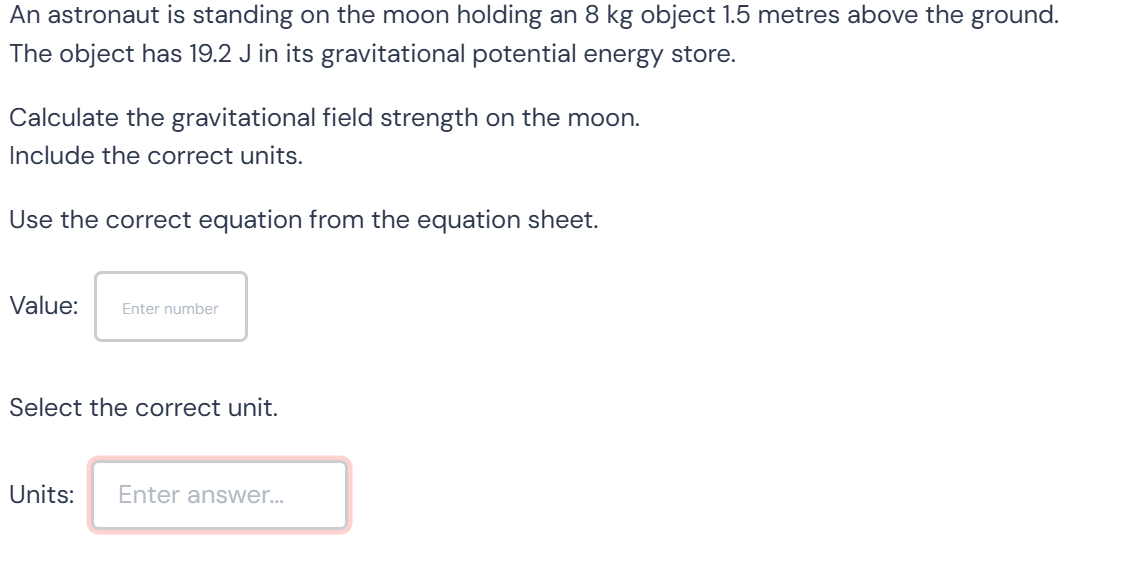
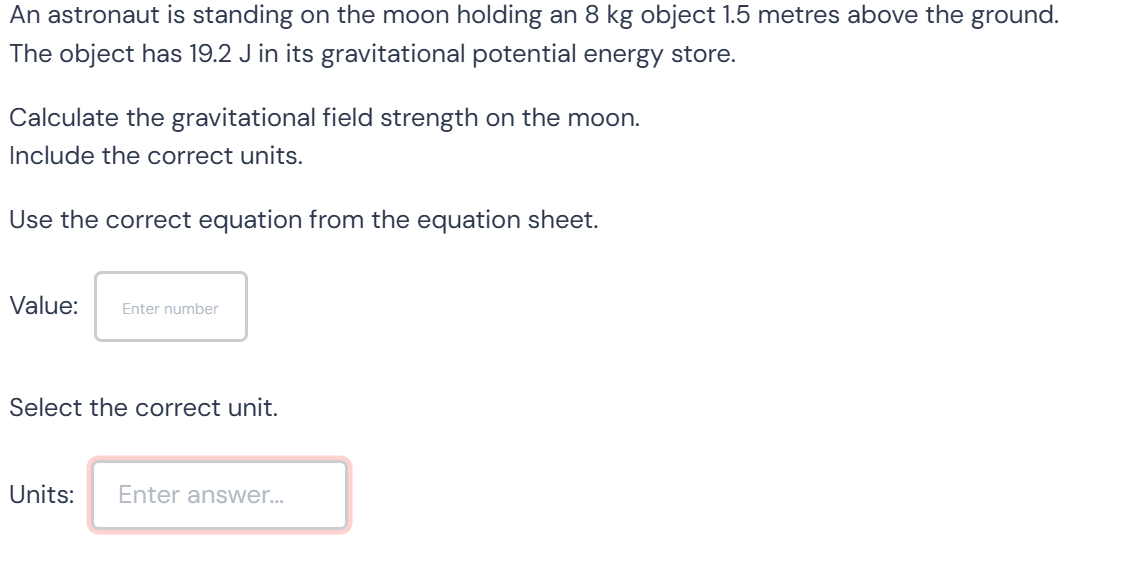

In [9]:
data